In [2]:
#import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gmaps
import numpy as np
import scipy.stats as stats
from config import gkey

#set gmaps settings
gmaps.configure(api_key = gkey)

#import metro area csvs
other_state_commute_data = pd.read_csv("..\Resources\other_state_commute_data.csv")
metro_commute_data_MO = pd.read_csv("..\Resources\metro_commute_data_MO.csv")

## Create Metro Area Tables

In [3]:
#combine MO and non-MO metro county tables
metro_commute_data = metro_commute_data_MO.append(other_state_commute_data)

#locate data for each metro area
KC_metro_data = metro_commute_data.loc[metro_commute_data["Metro Pole"] == "Kansas City"]
STL_metro_data = metro_commute_data.loc[metro_commute_data["Metro Pole"] == "St. Louis"]
SPR_metro_data = metro_commute_data.loc[metro_commute_data["Metro Pole"] == "Springfield"]

## Heat maps: Concentration of Commuters

### Kansas City

In [4]:
##plot heatmap of # of commuters
#set gmaps figure
KC_commuter_fig = gmaps.figure()

#set coordinates as locations
KC_metro_locations = KC_metro_data[["Latitude", "Longitude"]]

#plot heat layer
heat_layer = gmaps.heatmap_layer(KC_metro_locations, weights=KC_metro_data["Total Commuters"], 
                                 dissipating=False, max_intensity=max(KC_metro_data["Total Commuters"]),
                                 point_radius = .333)

#adjust heat layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = max(KC_metro_data["Total Commuters"])
heat_layer.point_radius = .333
#add heat layer to figure
KC_commuter_fig.add_layer(heat_layer)

KC_commuter_fig

Figure(layout=FigureLayout(height='420px'))

### St. Louis

In [5]:
#set gmaps figure
STL_commuter_fig = gmaps.figure()

#set coordinates as locations
STL_metro_locations = STL_metro_data[["Latitude", "Longitude"]]

#plot heat layer
heat_layer = gmaps.heatmap_layer(STL_metro_locations, weights=STL_metro_data["Total Commuters"], 
                                 dissipating=False, max_intensity=max(STL_metro_data["Total Commuters"]),
                                 point_radius = .333)

#adjust heat layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = max(STL_metro_data["Total Commuters"])
heat_layer.point_radius = .333
#add heat layer to figure
STL_commuter_fig.add_layer(heat_layer)

STL_commuter_fig

Figure(layout=FigureLayout(height='420px'))

### Springfield

In [6]:
#set gmaps figure
SPR_commuter_fig = gmaps.figure()

#set coordinates as locations
SPR_metro_locations = SPR_metro_data[["Latitude", "Longitude"]]

#plot heat layer
heat_layer = gmaps.heatmap_layer(SPR_metro_locations, weights=SPR_metro_data["Total Commuters"], 
                                 dissipating=False, max_intensity=max(SPR_metro_data["Total Commuters"]),
                                 point_radius = .333)

#adjust heat layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = max(SPR_metro_data["Total Commuters"])
heat_layer.point_radius = .333
#add heat layer to figure
SPR_commuter_fig.add_layer(heat_layer)

SPR_commuter_fig

Figure(layout=FigureLayout(height='420px'))

## Metro Areas Tables


### Metro Areas Commute Overview

In [7]:
#calculate total population, total commuters, and commuter % for each metro area
KC_total_pop = KC_metro_data["Total Population"].sum()
KC_total_commuters = KC_metro_data["Total Commuters"].sum()
KC_commuter_perc = KC_total_commuters / KC_total_pop * 100

STL_total_pop = STL_metro_data["Total Population"].sum()
STL_total_commuters = STL_metro_data["Total Commuters"].sum()
STL_commuter_perc = STL_total_commuters / STL_total_pop * 100

SPR_total_pop = SPR_metro_data["Total Population"].sum()
SPR_total_commuters = SPR_metro_data["Total Commuters"].sum()
SPR_commuter_perc = SPR_total_commuters / SPR_total_pop * 100

#create metro commute overview table
metro_pop_df = pd.DataFrame([{"City": "Kansas City", "Total Metro Population": KC_total_pop, 
                              "Total Commuters": KC_total_commuters, "Commuter %": KC_commuter_perc}, 
                             {"City": "St. Louis", "Total Metro Population": STL_total_pop, 
                              "Total Commuters": STL_total_commuters, "Commuter %": STL_commuter_perc}, 
                             {"City": "Springfield", "Total Metro Population": SPR_total_pop, 
                              "Total Commuters": SPR_total_commuters, "Commuter %": SPR_commuter_perc}])

#table formatting
metro_pop_df = metro_pop_df.set_index("City")
metro_pop_df = metro_pop_df[["Total Metro Population", "Total Commuters", "Commuter %"]]
metro_pop_df

,Total Metro Population,Total Commuters,Commuter %
City,,,
Kansas City,2070147.0,1016774.0,49.116029
St. Louis,2734868.0,1312846.0,48.003999
Springfield,452198.0,205386.0,45.419484


### Metro Areas Commute Type Breakdown

In [8]:
#calculate totals for commute types for each metro area
KC_solo = KC_metro_data["Solo Commuters"].sum()
KC_carpool = KC_metro_data["Carpoolers"].sum()
KC_public = KC_metro_data["Public Transit"].sum()
KC_walk = KC_metro_data["Walking"].sum()
KC_other = KC_metro_data["Other Transit"].sum()

STL_solo = STL_metro_data["Solo Commuters"].sum()
STL_carpool = STL_metro_data["Carpoolers"].sum()
STL_public = STL_metro_data["Public Transit"].sum()
STL_walk = STL_metro_data["Walking"].sum()
STL_other = STL_metro_data["Other Transit"].sum()

SPR_solo = SPR_metro_data["Solo Commuters"].sum()
SPR_carpool = SPR_metro_data["Carpoolers"].sum()
SPR_public = SPR_metro_data["Public Transit"].sum()
SPR_walk = SPR_metro_data["Walking"].sum()
SPR_other = SPR_metro_data["Other Transit"].sum()

#calculate %s for each commute type for each metro area
KC_solo_perc = KC_solo / metro_pop_df["Total Commuters"]["Kansas City"] * 100
KC_carpool_perc = KC_carpool / metro_pop_df["Total Commuters"]["Kansas City"] * 100
KC_public_perc = KC_public / metro_pop_df["Total Commuters"]["Kansas City"] * 100
KC_walk_perc = KC_walk / metro_pop_df["Total Commuters"]["Kansas City"] * 100
KC_other_perc = KC_other / metro_pop_df["Total Commuters"]["Kansas City"] * 100

STL_solo_perc = STL_solo / metro_pop_df["Total Commuters"]["St. Louis"] * 100
STL_carpool_perc = STL_carpool / metro_pop_df["Total Commuters"]["St. Louis"] * 100
STL_public_perc = STL_public / metro_pop_df["Total Commuters"]["St. Louis"] * 100
STL_walk_perc = STL_walk / metro_pop_df["Total Commuters"]["St. Louis"] * 100
STL_other_perc = STL_other / metro_pop_df["Total Commuters"]["St. Louis"] * 100

SPR_solo_perc = SPR_solo / metro_pop_df["Total Commuters"]["Springfield"] * 100
SPR_carpool_perc = SPR_carpool / metro_pop_df["Total Commuters"]["Springfield"] * 100
SPR_public_perc = SPR_public / metro_pop_df["Total Commuters"]["Springfield"] * 100
SPR_walk_perc = SPR_walk / metro_pop_df["Total Commuters"]["Springfield"] * 100
SPR_other_perc = SPR_other / metro_pop_df["Total Commuters"]["Springfield"] * 100

#create metro commute types table
metro_commute_df = pd.DataFrame([{"City": "Kansas City", 
                                  "Solo Commuters": KC_solo, "Solo Commuter %": KC_solo_perc, 
                                  "Carpoolers": KC_carpool, "Carpooler %": KC_carpool_perc, 
                                  "Public Transit": KC_public, "Public Transit %": KC_public_perc, 
                                  "Walking": KC_walk, "Walking %": KC_walk_perc, 
                                  "Other Transit": KC_other, "Other Transit %": KC_other_perc}, 
                                 {"City": "St. Louis", 
                                  "Solo Commuters": STL_solo, "Solo Commuter %": STL_solo_perc, 
                                  "Carpoolers": STL_carpool, "Carpooler %": STL_carpool_perc, 
                                  "Public Transit": STL_public, "Public Transit %": STL_public_perc, 
                                  "Walking": STL_walk, "Walking %": STL_walk_perc, 
                                  "Other Transit": STL_other, "Other Transit %": STL_other_perc}, 
                                 {"City": "Springfield", 
                                  "Solo Commuters": SPR_solo, "Solo Commuter %": SPR_solo_perc, 
                                  "Carpoolers": SPR_carpool, "Carpooler %": SPR_carpool_perc, 
                                  "Public Transit": SPR_public, "Public Transit %": SPR_public_perc, 
                                  "Walking": SPR_walk, "Walking %": SPR_walk_perc, 
                                  "Other Transit": SPR_other, "Other Transit %": SPR_other_perc}])

#table formatting
metro_commute_df = metro_commute_df.set_index("City")
metro_commute_df = metro_commute_df[["Solo Commuters", "Solo Commuter %", "Carpoolers", "Carpooler %", 
                                     "Public Transit", "Public Transit %", "Walking", "Walking %", 
                                     "Other Transit", "Other Transit %"]]
metro_commute_df

,Solo Commuters,Solo Commuter %,Carpoolers,Carpooler %,Public Transit,Public Transit %,Walking,Walking %,Other Transit,Other Transit %
City,,,,,,,,,,
Kansas City,848074.0,83.408309,86296.0,8.487235,10956.0,1.077526,13385.0,1.316418,10895.0,1.071526
St. Louis,1087571.0,82.840714,96867.0,7.378398,35540.0,2.707096,21171.0,1.612603,14627.0,1.114144
Springfield,167545.0,81.575667,20814.0,10.134089,967.0,0.470821,3952.0,1.924182,3420.0,1.665157


In [9]:
#isolate %s
metro_commute_percs = metro_commute_df[["Solo Commuter %", "Carpooler %", "Public Transit %", "Walking %", "Other Transit %"]]
metro_commute_percs

,Solo Commuter %,Carpooler %,Public Transit %,Walking %,Other Transit %
City,,,,,
Kansas City,83.408309,8.487235,1.077526,1.316418,1.071526
St. Louis,82.840714,7.378398,2.707096,1.612603,1.114144
Springfield,81.575667,10.134089,0.470821,1.924182,1.665157


## Plot Commute Type % by Metro Area

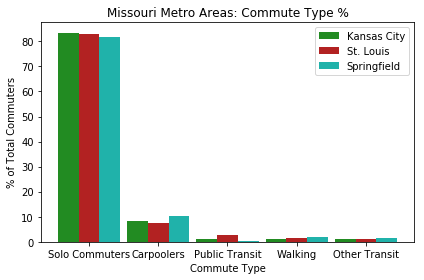

In [10]:
#list commute types
commute_types = ["Solo Commuters", "Carpoolers", "Public Transit", "Walking", "Other Transit"]
#set #s for x axis
x_axis = np.arange(0, 5)

#locate commute type %s for each metro area
KC_percs = metro_commute_percs.loc["Kansas City", :]
STL_percs = metro_commute_percs.loc["St. Louis", :]
SPR_percs = metro_commute_percs.loc["Springfield", :]

#create metro commute type graph
metro_commute_plot = plt.figure()
metro_commutes = plt.subplot()

#plot each metro area's %s
KC_plot = metro_commutes.bar(x_axis-.3, KC_percs, width = .3, color = "forestgreen", label = "Kansas City")
STL_plot = metro_commutes.bar(x_axis, STL_percs, width = .3, color = "firebrick", label = "St. Louis")
SPR_plot = metro_commutes.bar(x_axis+.3, SPR_percs, width = .3, color = "lightseagreen", label = "Springfield")

#graph formatting
plt.legend(loc = "best")
plt.xticks(x_axis, commute_types)
plt.title("Missouri Metro Areas: Commute Type %")
plt.xlabel("Commute Type")
plt.ylabel("% of Total Commuters")
plt.tight_layout()

#export figure
metro_commute_plot.savefig("..\Output\MO metro areas commute type.png", bbox_inches="tight")

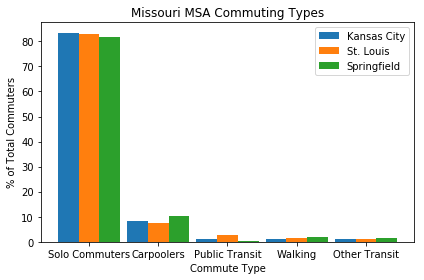

In [11]:
#list commute types
commute_types = ["Solo Commuters", "Carpoolers", "Public Transit", "Walking", "Other Transit"]
#set #s for x axis
x_axis = np.arange(0, 5)

#locate commute type %s for each metro area
KC_percs = metro_commute_percs.loc["Kansas City", :]
STL_percs = metro_commute_percs.loc["St. Louis", :]
SPR_percs = metro_commute_percs.loc["Springfield", :]

#create metro commute type graph
metro_commute_plot = plt.figure()
metro_commutes = plt.subplot()

#plot each metro area's %s
KC_plot = metro_commutes.bar(x_axis-.3, KC_percs, width = .3, label = "Kansas City")
STL_plot = metro_commutes.bar(x_axis, STL_percs, width = .3, label = "St. Louis")
SPR_plot = metro_commutes.bar(x_axis+.3, SPR_percs, width = .3, label = "Springfield")

#graph formatting
plt.legend(loc = "best")
plt.xticks(x_axis, commute_types)
plt.title("Missouri MSA Commuting Types")
plt.xlabel("Commute Type")
plt.ylabel("% of Total Commuters")
plt.tight_layout()

#export figure
metro_commute_plot.savefig("..\Output\MO metro areas commute type Default Colors.png", bbox_inches="tight")

## Statistical Analysis - ANOVA & T-Tests

In [ ]:
#anova analysis on each metro area's numerical columns
anova_metro = stats.f_oneway(KC_metro_data.iloc[:, 3:15], STL_metro_data.iloc[:, 3:15], SPR_metro_data.iloc[:, 3:15])
anova_metro

### Commuter %, Carpool %, and Other Transit % have p-values < .05

In [ ]:
#run t-tests for each city pair for each sig diff category
print(stats.ttest_ind(KC_metro_data["Commuter %"], STL_metro_data["Commuter %"], equal_var=False))
print(stats.ttest_ind(KC_metro_data["Commuter %"], SPR_metro_data["Commuter %"], equal_var=False))
print(stats.ttest_ind(STL_metro_data["Commuter %"], SPR_metro_data["Commuter %"], equal_var=False))
print("----")
print(stats.ttest_ind(KC_metro_data["Carpooler %"], STL_metro_data["Carpooler %"], equal_var=False))
print(stats.ttest_ind(KC_metro_data["Carpooler %"], SPR_metro_data["Carpooler %"], equal_var=False))
print(stats.ttest_ind(STL_metro_data["Carpooler %"], SPR_metro_data["Carpooler %"], equal_var=False))
print("----")
print(stats.ttest_ind(KC_metro_data["Other Transit %"], STL_metro_data["Other Transit %"], equal_var=False))
print(stats.ttest_ind(KC_metro_data["Other Transit %"], SPR_metro_data["Other Transit %"], equal_var=False))
print(stats.ttest_ind(STL_metro_data["Other Transit %"], SPR_metro_data["Other Transit %"], equal_var=False))

### Only KC and STL Carpooler % have p-value < .05